In [19]:
import numpy as np # matris işlemleri
import cv2 # görüntü işlemleri
import matplotlib.pyplot as plt # görüntü ve grafik gösterimleri

#### Örnek resmimizi içeri aktaralım

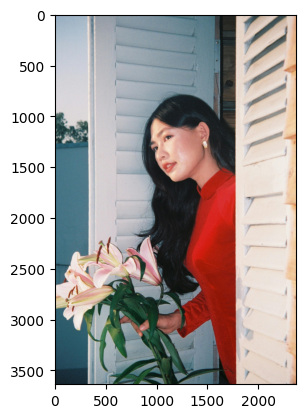

In [20]:
path = "C:/Users/Asus/Desktop/YT Serisi/img/example_3.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # matplotlib giriş için bgr formatında görüntüler aldığı için red ve blueyu yer değiştirdik
plt.imshow(img)

### Bulanıklaştırma Filtresi

In [21]:
blur_kernel = np.ones((3, 3), np.float32) / 5
blur_kernel

array([[0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2]], dtype=float32)

### Keskinleştirme Filtresi

In [22]:
sharp_kernel =  np.array([[1,1,1], [1,-7,1], [1,1,1]])
sharp_kernel

array([[ 1,  1,  1],
       [ 1, -7,  1],
       [ 1,  1,  1]])

### Kabartma Filtresi

In [23]:
embossing_kernel = np.array([[0,-1,0], [0,0, 0], [0,1,0]])
embossing_kernel

array([[ 0, -1,  0],
       [ 0,  0,  0],
       [ 0,  1,  0]])

#### Uygulama

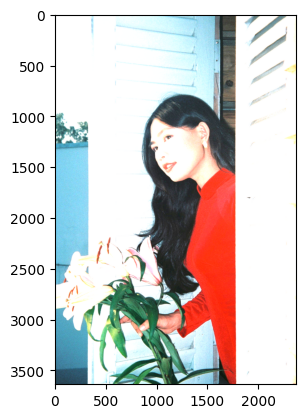

In [24]:
blur_output = cv2.filter2D(img, -1, blur_kernel)
plt.imshow(blur_output)

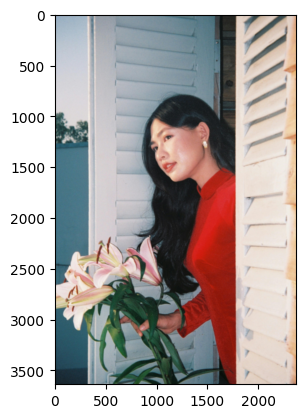

In [25]:
sharp_output = cv2.filter2D(img, -1, sharp_kernel)
plt.imshow(sharp_output)

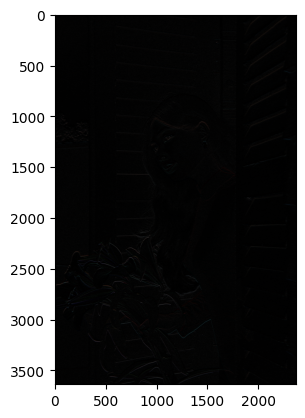

In [26]:
embossing_output = cv2.filter2D(img, -1,embossing_kernel)
plt.imshow(embossing_output)

### OpenCV'deki yerleşik metodları kullanarak filtrelemek

In [39]:
# Bulanıklaştırma
output2_b = cv2.blur(img, (5, 5))
# Median Bulanıklaştırma
output_m = cv2.medianBlur(img, ksize=25)
# Gaussian Bulanıklaştırma
output_g = cv2.GaussianBlur(img, (25,25), 0) # Gaussian Kernel

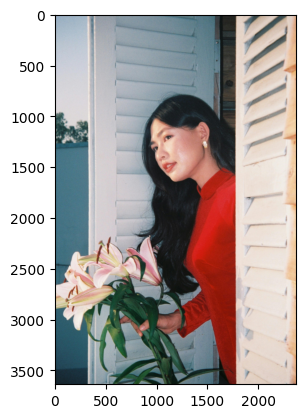

In [40]:
plt.imshow(output2_b)

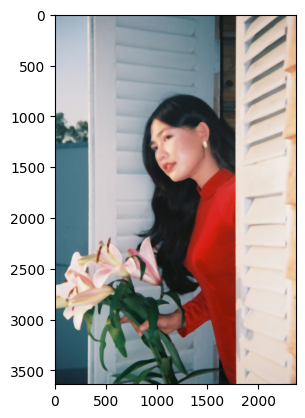

In [41]:
plt.imshow(output_m)

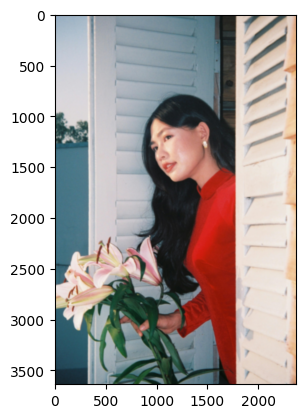

In [42]:
plt.imshow(output_g)

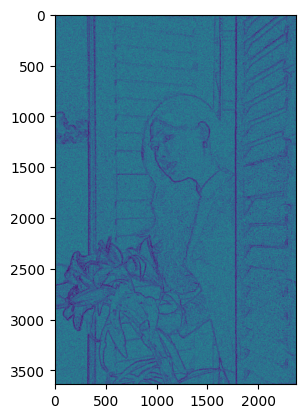

In [37]:
# kenar algılama
t_lower = 50  # alt eşik
t_upper = 110  # üst eşik 
aperture_size = 5  # Sobel filtresi 'açıklık' parametresi

edge = cv2.Canny(img, t_lower, t_upper,apertureSize=aperture_size) 
plt.imshow(edge)


Bulunan kontur sayısı= 109682


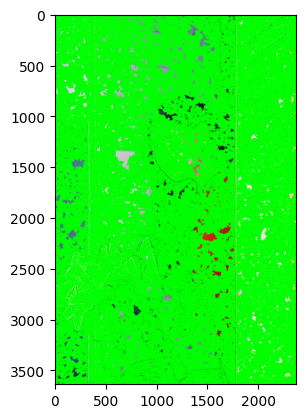

In [38]:
# konturları bulmak
contours, hierarchy = cv2.findContours(edge,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
print("Bulunan kontur sayısı= " + str(len(contours))) 

contours_img = img.copy()
cv2.drawContours(contours_img, contours, -1, (0, 255, 0), 3) # konturları çizdir
plt.imshow(contours_img)